**1. Carga de modulos**

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

**2. Carga de bases de datos**

In [177]:
bd_diabetic_data = pd.read_csv('data/diabetic_data.csv')
bd_AdmissionSource = pd.read_csv('data/admission_source_id.csv')
bd_admission_type_id = pd.read_csv('data/admission_type_id.csv')
bd_discharge_disposition_id = pd.read_csv('data/discharge_disposition_id.csv')

In [4]:
#bd_diabetic_data.shape
#bd_diabetic_data.dtypes
bd_diabetic_data.groupby("admission_type_id").size()

admission_type_id
1    53990
2    18480
3    18869
4       10
5     4785
6     5291
7       21
8      320
dtype: int64

*Comprobar correcta lectura de datos*

In [11]:
bd_AdmissionSource.head(10)

,admission_source_id,description
0,1,Physician Referral
1,2,Clinic Referral
2,3,HMO Referral
3,4,Transfer from a hospital
4,5,Transfer from a Skilled Nursing Facility (SNF)
5,6,Transfer from another health care facility
6,7,Emergency Room
7,8,Court/Law Enforcement
8,9,Not Available
9,10,Transfer from critial access hospital


In [12]:
bd_admission_type_id.head(10)

,admission_type_id,description
0,1,Emergency
1,2,Urgent
2,3,Elective
3,4,Newborn
4,5,Not Available
5,6,None
6,7,Trauma Center
7,8,Not Mapped


In [13]:
bd_discharge_disposition_id.head(10)

,discharge_disposition_id,description
0,1,Discharged to home
1,2,Discharged/transferred to another short term h...
2,3,Discharged/transferred to SNF
3,4,Discharged/transferred to ICF
4,5,Discharged/transferred to another type of inpa...
5,6,Discharged/transferred to home with home healt...
6,7,Left AMA
7,8,Discharged/transferred to home under care of H...
8,9,Admitted as an inpatient to this hospital
9,10,Neonate discharged to another hospital for neo...


*Juntamos las bases de datos*

In [178]:
bd_diabetes1 = pd.merge(bd_diabetic_data,bd_AdmissionSource, on = "admission_source_id", how = "left")
bd_diabetes2 = pd.merge(bd_diabetes1,bd_admission_type_id, on = "admission_type_id", how = "left" )
bd_full = pd.merge(bd_diabetes2,bd_discharge_disposition_id, on = "discharge_disposition_id", how  = "left")

In [179]:
bd_full.shape

(101766, 53)

*Renombramos las variables por buenas prácticas*

In [180]:
columnsNameDiabetes = ["encounter_id", "patient_nbr", "race", "gender", "age", "weight", "admission_type_id", "discharge_disposition_id",
                       "admission_source_id", "time_in_hospital", "payer_code", "medical_specialty", "num_lab_procedures", "num_procedures",
                       "num_medications", "number_outpatient", "number_emergency", "number_inpatient", "diag_1", "diag_2", "diag_3",
                       "number_diagnoses", "max_glu_serum", "a1c_result", "metformin", "repaglinide", "nateglinide", "chlorpropamide",
                       "glimepiride", "acetohexamide", "glipizide", "glyburide", "tolbutamide", "pioglitazone", "rosiglitazone", "acarbose",
                       "miglitol", "troglitazone", "tolazamide", "examide", "citoglipton", "insulin", "glyburide_metformin", "glipizide_metformin",
                       "glimepiride_pioglitazone", "metformin_rosiglitazone", "metformin_pioglitazone", "change", "diabetes_med", "readmitted",
                       "description_x", "description_y", "description"]

In [181]:
bd_full.columns = columnsNameDiabetes

**3. Analizamos la variable target**

In [15]:
print("Número de filas: " + str(bd_full.shape[0]))
print("Número de columnas: " + str(bd_full.shape[1]))

Número de filas: 101766
Número de columnas: 53


In [25]:
bd_full.info()

In [20]:
bd_full["readmitted"].describe()
bd_full.groupby("readmitted").size()

readmitted
<30    11357
>30    35545
NO     54864
dtype: int64

In [182]:
columnTarget = "target"
bd_full[columnTarget] = bd_full["readmitted"].map({"NO":0,"<30":1,">30":1})

In [183]:
bd_full.groupby(columnTarget).size()/bd_full.shape[0]

target
0    0.539119
1    0.460881
dtype: float64

In [184]:
pd.crosstab(bd_full["readmitted"],bd_full["target"])

target,0,1
readmitted,,
<30,0,11357
>30,0,35545
NO,54864,0


**4. Diferenciamos los tipos de variables por buenas practicas**

In [185]:
columnsNumeric = ["time_in_hospital", "num_lab_procedures", "num_procedures", "num_medications", "number_outpatient", "number_emergency",
                   "number_inpatient", "number_diagnoses"]
columnsString = ["race", "gender", "age", "weight", "payer_code", "medical_specialty", "diag_1", "diag_2", "diag_3",
                   "max_glu_serum", "a1c_result", "metformin", "repaglinide", "nateglinide", "chlorpropamide", "glimepiride", "acetohexamide",
                   "glipizide", "glyburide", "tolbutamide", "pioglitazone", "rosiglitazone", "acarbose", "miglitol", "troglitazone", "tolazamide",
                   "examide", "citoglipton", "insulin", "glyburide_metformin", "glipizide_metformin", "glimepiride_pioglitazone", "metformin_rosiglitazone",
                   "metformin_pioglitazone", "change", "diabetes_med", "description_x", "description_y", "description"]
columnTarget = "target"

*Estudiamos las variables numericas*

In [30]:
bd_full[columnsNumeric].describe()

,time_in_hospital,num_lab_procedures,num_procedures,num_medications,number_outpatient,number_emergency,number_inpatient,number_diagnoses
count,101766.000000,101766.000000,101766.000000,101766.000000,101766.000000,101766.000000,101766.000000,101766.000000
mean,4.395987,43.095641,1.339730,16.021844,0.369357,0.197836,0.635566,7.422607
std,2.985108,19.674362,1.705807,8.127566,1.267265,0.930472,1.262863,1.933600
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000
25%,2.000000,31.000000,0.000000,10.000000,0.000000,0.000000,0.000000,6.000000
50%,4.000000,44.000000,1.000000,15.000000,0.000000,0.000000,0.000000,8.000000
75%,6.000000,57.000000,2.000000,20.000000,0.000000,0.000000,1.000000,9.000000
max,14.000000,132.000000,6.000000,81.000000,42.000000,76.000000,21.000000,16.000000


*analizamos las varianzas mas cercanas a cero*

In [31]:
bd_full[columnsNumeric].var().sort_values(ascending = False)

num_lab_procedures    387.080530
num_medications        66.057332
time_in_hospital        8.910868
number_diagnoses        3.738810
num_procedures          2.909777
number_outpatient       1.605961
number_inpatient        1.594824
number_emergency        0.865779
dtype: float64

*Hacemos un analisis de frecuencia a la variable: number_emergency porqeu tiene la varianza mas pequeña*

In [187]:
bd_full.groupby("number_emergency").size()/bd_full["number_emergency"].shape[0]

*Revisamos las frecuencias de las variables numéricas*

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000000000BE3B898>,
      dtype=object)

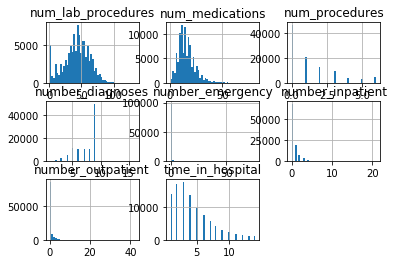

In [36]:
bd_full[columnsNumeric].hist(bins = 50)

In [49]:
def frecuencia (x):
    frec = bd_full.groupby(x).size()/bd_full[x].shape[0]
    print(frec)
    print("\n")

*A las variables "number_outpatient", "number_emergency" y "number_inpatient" hacemos un analisis de frecuencia*

In [50]:
print(frecuencia("number_outpatient"))
print(frecuencia("number_emergency"))
print(frecuencia("number_inpatient"))

number_outpatient
0     0.835515
1     0.083987
2     0.035316
3     0.020066
4     0.010799
5     0.005238
6     0.002977
7     0.001523
8     0.000963
9     0.000816
10    0.000560
11    0.000413
12    0.000295
13    0.000305
14    0.000275
15    0.000197
16    0.000147
17    0.000079
18    0.000049
19    0.000029
20    0.000069
21    0.000069
22    0.000049
23    0.000020
24    0.000029
25    0.000020
26    0.000020
27    0.000029
28    0.000010
29    0.000020
33    0.000020
34    0.000010
35    0.000020
36    0.000020
37    0.000010
38    0.000010
39    0.000010
40    0.000010
42    0.000010
dtype: float64


None
number_emergency
0     0.888145
1     0.075438
2     0.020066
3     0.007124
4     0.003675
5     0.001887
6     0.000924
7     0.000717
8     0.000491
9     0.000324
10    0.000334
11    0.000226
12    0.000098
13    0.000118
14    0.000029
15    0.000029
16    0.000049
18    0.000049
19    0.000039
20    0.000039
21    0.000020
22    0.000059
24    0.000010
25    0.00002

*Viendo presencia de valores perdidos*

In [188]:
for x in columnsNumeric:
    print(x)
    print(bd_full.loc[(pd.isna(bd_full[x]))].shape[0])
    print("\n")

time_in_hospital
0


num_lab_procedures
0


num_procedures
0


num_medications
0


number_outpatient
0


number_emergency
0


number_inpatient
0


number_diagnoses
0




*Viendo presencia de atípicos*

{'whiskers': [<matplotlib.lines.Line2D at 0x148acd68>,
 'caps': [<matplotlib.lines.Line2D at 0x148b7438>,
 'boxes': [<matplotlib.lines.Line2D at 0x148ac978>],
 'medians': [<matplotlib.lines.Line2D at 0x148b7ac8>],
 'fliers': [<matplotlib.lines.Line2D at 0x148b7e10>],
 'means': []}

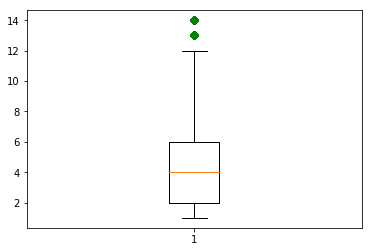

In [58]:
plt.boxplot(bd_full["time_in_hospital"] , 0, 'gD')

In [60]:
for x in bd_full[columnsNumeric].columns:
    plt.title(x)
    plt.boxplot(bd_full[x] , 0, 'gD')
    plt.show()

In [189]:
# Función de Identificar Outliers:
def calcularOutliars(x):
  Q01 = x.quantile(0.25)
  Q03 = x.quantile(0.75)
  IQR = Q03 - Q01
  a = (x < (Q01 - 1.5 * IQR)) | (x > (Q03 + 1.5 * IQR))
  numOutliars = a[a == True].shape[0]
  pornumOutliars = numOutliars/x.shape[0]
  return pornumOutliars

In [67]:
calcularOutliars(bd_full["time_in_hospital"])

0.022129198357015115

In [190]:
for x in columnsNumeric:
    print(x)
    print(calcularOutliars(bd_full[x]))
    print("\n")

time_in_hospital
0.022129198357015115


num_lab_procedures
0.0014051844427411906


num_procedures
0.04868030579957943


num_medications
0.025126270070554017


number_outpatient
0.16448519151779573


number_emergency
0.11185464693512569


number_inpatient
0.0692667492089696


number_diagnoses
0.0027612365623096123




In [191]:
#Imputamos los valores outliers en nuevas variables
#==================================================
#creamos la función de reemplazo de outliers
def fun_rep(num): 
    if num > LS: 
        return LS
    elif num < LI and num > 0: 
        return LI
    else: 
        return num

In [192]:
#Variable number_diagnoses
Q01 = bd_full["number_diagnoses"].quantile(0.25)
Q03 = bd_full["number_diagnoses"].quantile(0.75)
IQR = Q03 - Q01
LS = Q03 + 1.5 * IQR
LI = Q01 - 1.5 * IQR

bd_full["number_diagnoses_imp"] = bd_full["number_diagnoses"].apply(fun_rep)

In [193]:
#Variable num_lab_procedures
Q01 = bd_full["num_lab_procedures"].quantile(0.25)
Q03 = bd_full["num_lab_procedures"].quantile(0.75)
IQR = Q03 - Q01
LS = Q03 + 1.5 * IQR
LI = Q01 - 1.5 * IQR

bd_full["num_lab_procedures_imp"] = bd_full["num_lab_procedures"].apply(fun_rep)

{'whiskers': [<matplotlib.lines.Line2D at 0x58f4a90>,
 'caps': [<matplotlib.lines.Line2D at 0x58f4ac8>,
 'boxes': [<matplotlib.lines.Line2D at 0x58f4710>],
 'medians': [<matplotlib.lines.Line2D at 0x58f3400>],
 'fliers': [<matplotlib.lines.Line2D at 0x58f3128>],
 'means': []}

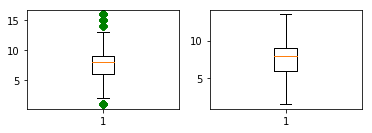

In [194]:
plt.figure()

plt.subplot(2,2,1)
plt.boxplot(bd_full["number_diagnoses"] , 0, 'gD')

plt.subplot(2,2,2)
plt.boxplot(bd_full["number_diagnoses_imp"] , 0, 'gD')

In [147]:
bd_full[columnsNumeric].dtypes

In [195]:
#Retiramos variables numéricas
columnsNumeric.remove('number_diagnoses')
columnsNumeric.remove('num_lab_procedures')

In [196]:
#Aderimos las nuevas variables numéricas
columnsNumeric = columnsNumeric + ["number_diagnoses_imp"] + ["num_lab_procedures_imp"]

*Observamos que se acumulan en 0 pero no en un 90% (no en la gran mayoria), lo tendremos en cuenta en la exploración de datos para descartarlas de ser necesario con más evidencia (mean encoding)*

**Para las variables categoricas vemos sus distribuciones**

In [104]:
#Corregimos las variables que no están definidas de forma correcta como NaN (nan)
for x in columnsString:
    print(x)
    print(bd_full.groupby(x).size())
    print("\n")

race
race
AfricanAmerican    19210
Asian                641
Caucasian          76099
Hispanic            2037
Other               1506
dtype: int64


gender
gender
Female    54708
Male      47055
dtype: int64


age
age
[0-10)        161
[10-20)       691
[20-30)      1657
[30-40)      3775
[40-50)      9685
[50-60)     17256
[60-70)     22483
[70-80)     26068
[80-90)     17197
[90-100)     2793
dtype: int64


max_glu_serum
max_glu_serum
>200     1485
>300     1264
None    96420
Norm     2597
dtype: int64


a1c_result
a1c_result
>7       3812
>8       8216
None    84748
Norm     4990
dtype: int64


metformin
metformin
Down        575
No        81778
Steady    18346
Up         1067
dtype: int64


repaglinide
repaglinide
Down          45
No        100227
Steady      1384
Up           110
dtype: int64


nateglinide
nateglinide
Down          11
No        101063
Steady       668
Up            24
dtype: int64


chlorpropamide
chlorpropamide
Down           1
No        101680
Steady        79


In [197]:
#Reemplazamos los valores extraños
bd_full["race"] = bd_full["race"].replace("?",np.nan)
bd_full["gender"] = bd_full["gender"].replace("Unknown/Invalid",np.nan)
bd_full["weight"] = bd_full["weight"].replace("?",np.nan)
bd_full["payer_code"] = bd_full["payer_code"].replace("?",np.nan)
bd_full["medical_specialty"] = bd_full["medical_specialty"].replace("?",np.nan)
bd_full["medical_specialty"] = bd_full["medical_specialty"].replace("?",np.nan)

In [198]:
#Viendo presencia de valores perdidos
for x in columnsString:
    print(x)
    print(bd_full.loc[(pd.isna(bd_full[x]))].shape[0]/bd_full[x].shape[0])
    print("\n")

race
0.022335554114340742


gender
2.947939390366134e-05


age
0.0


weight
0.9685847925633315


payer_code
0.395574160328597


medical_specialty
0.49082208203132677


diag_1
0.0


diag_2
0.0


diag_3
0.0


max_glu_serum
0.0


a1c_result
0.0


metformin
0.0


repaglinide
0.0


nateglinide
0.0


chlorpropamide
0.0


glimepiride
0.0


acetohexamide
0.0


glipizide
0.0


glyburide
0.0


tolbutamide
0.0


pioglitazone
0.0


rosiglitazone
0.0


acarbose
0.0


miglitol
0.0


troglitazone
0.0


tolazamide
0.0


examide
0.0


citoglipton
0.0


insulin
0.0


glyburide_metformin
0.0


glipizide_metformin
0.0


glimepiride_pioglitazone
0.0


metformin_rosiglitazone
0.0


metformin_pioglitazone
0.0


change
0.0


diabetes_med
0.0


description_x
0.0


description_y
0.0


description
0.0




In [200]:
#Retiramos las variables con muchos NAs
columnsString.remove('weight')
columnsString.remove('payer_code')
columnsString.remove('medical_specialty')

bd_full = bd_full.drop(['weight'],axis = 1)
bd_full = bd_full.drop(['payer_code'],axis = 1)
bd_full = bd_full.drop(['medical_specialty'],axis = 1)

In [202]:
#Como el porcentaje de nan es menor al 1% eliminamos los casos perdidos para un mejor ajuste
bd_full =  bd_full.dropna()

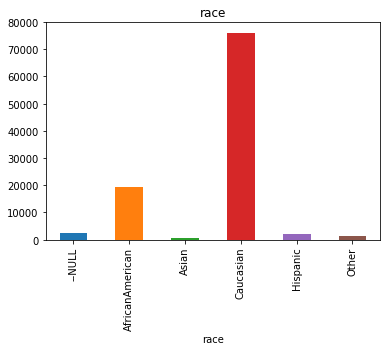

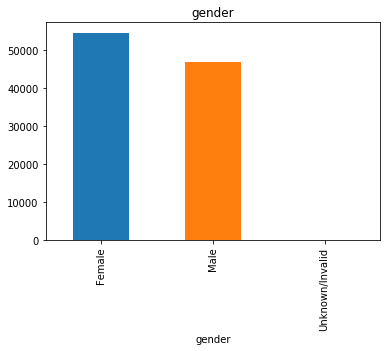

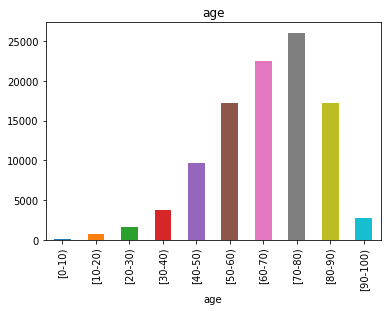

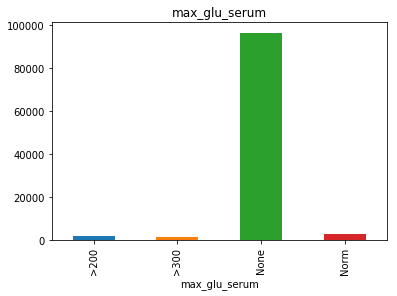

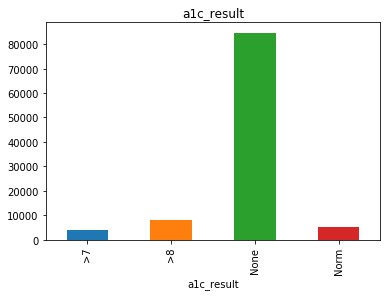

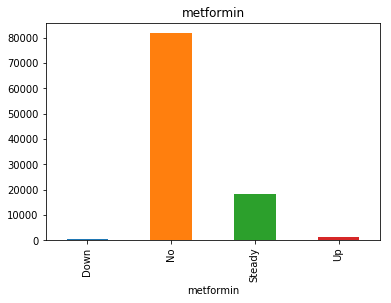

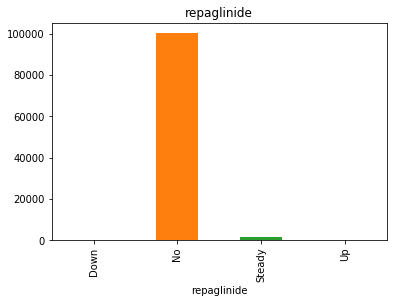

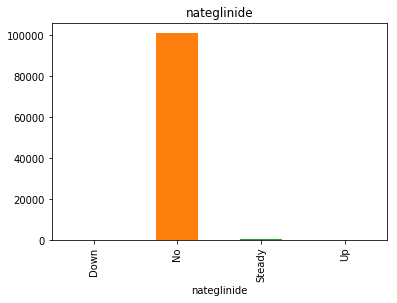

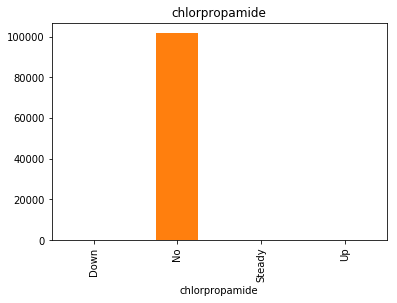

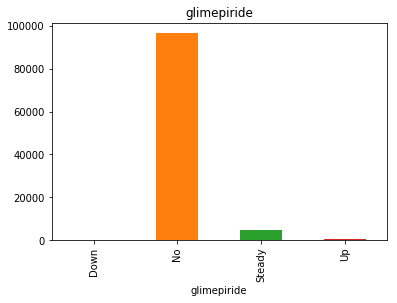

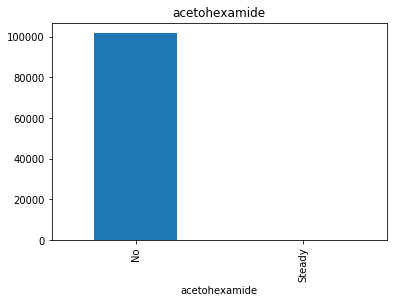

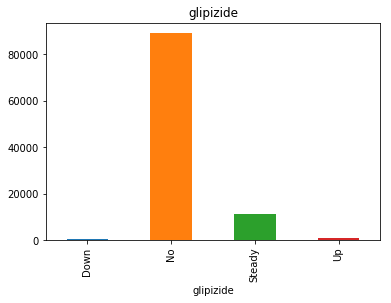

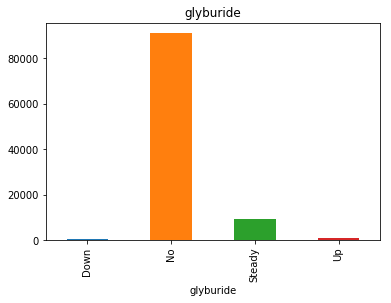

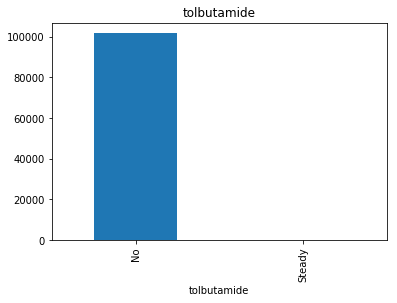

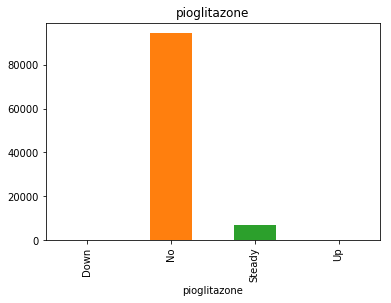

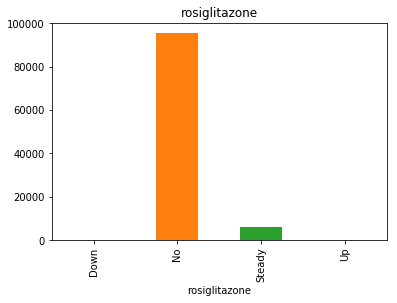

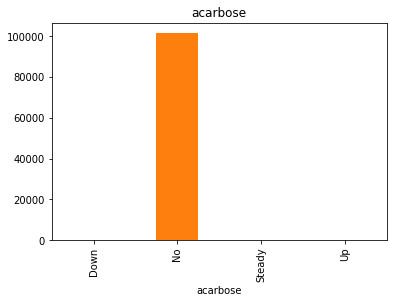

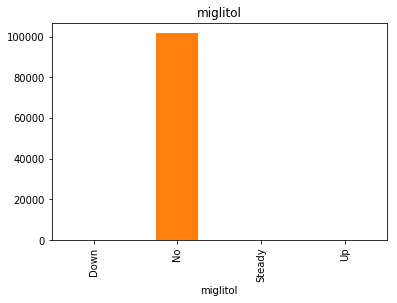

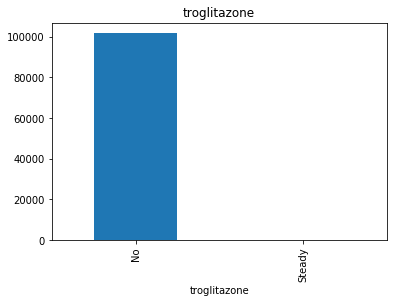

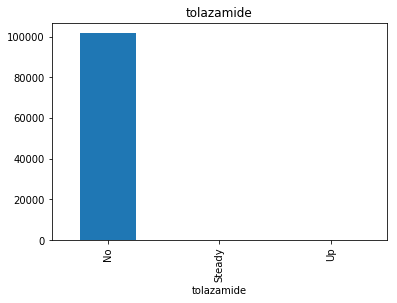

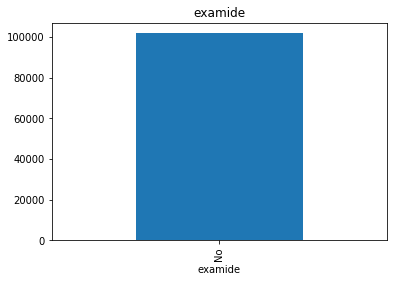

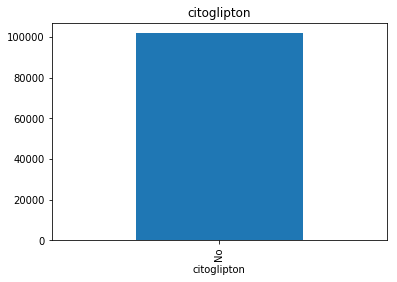

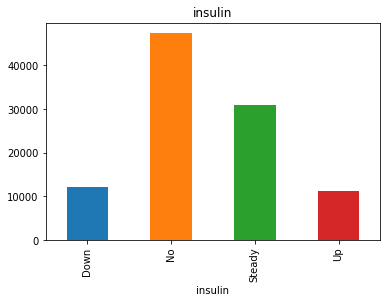

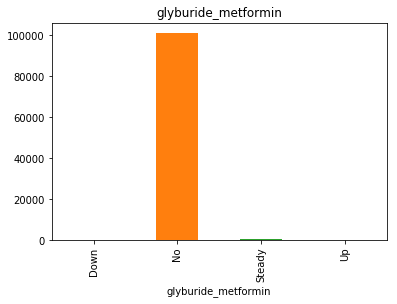

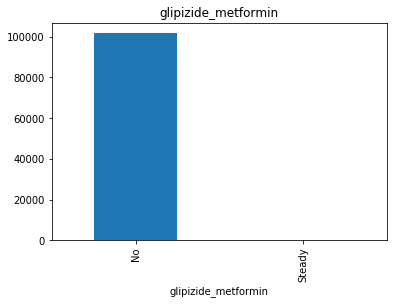

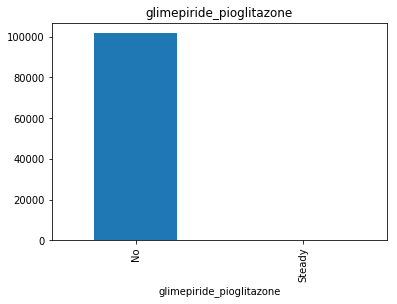

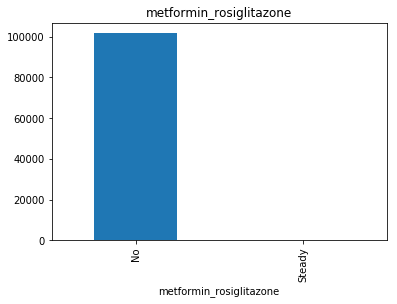

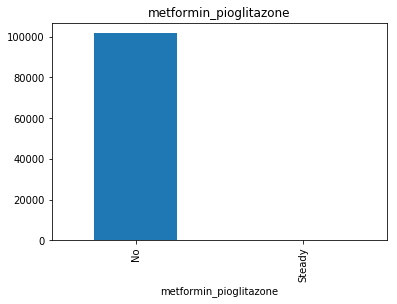

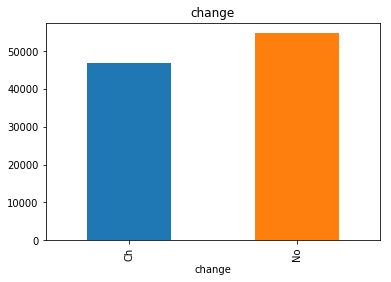

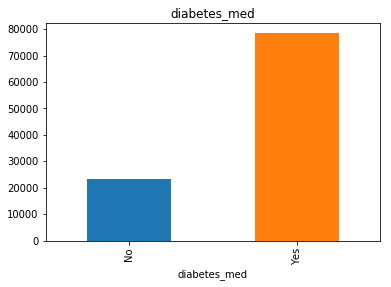

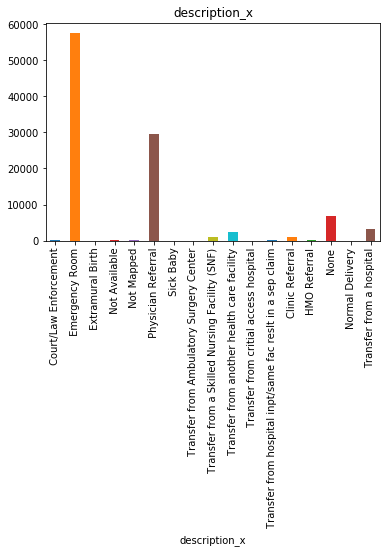

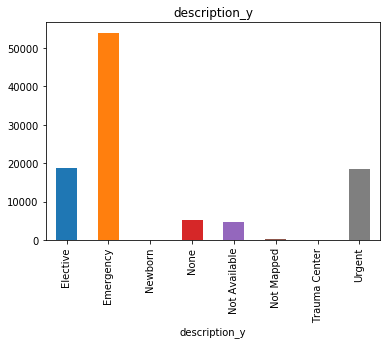

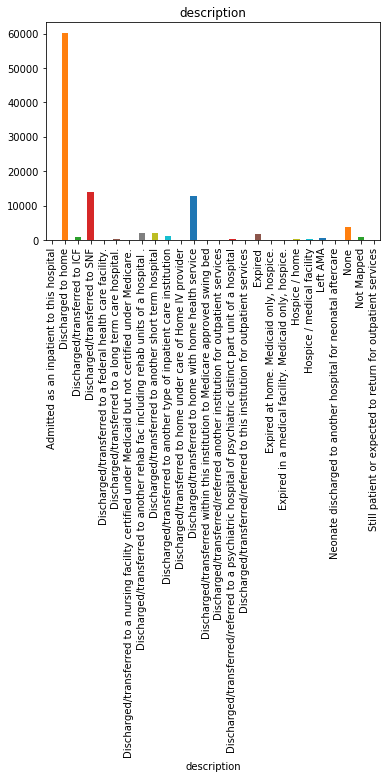

In [99]:
#Columnas categoricas
for x in columnsString:
  plt.title(x)
  bd_full.fillna("--NULL").groupby(x)[x].count().plot(kind = "bar")
  plt.show()

In [204]:
#Retiramos las variables diag_1 diag_2 diag_3
columnsNumeric.append("diag_1")
columnsNumeric.append("diag_2")
columnsNumeric.append("diag_3")

columnsString.remove("diag_1")
columnsString.remove("diag_2")
columnsString.remove("diag_3")

*Se observa que las variables diag_1, diag_2 y diag_3 son en su mayoria numéricas, revisamos el porcentaje de numéricas, no numericas y nulos.*

In [205]:
def changeType(x):
  try:
    a = float(x)
    if(np.isnan(a)):
      return -1
    else:
      return 1
  except:
    return 0
  
def diagToNumber(x):
  try:
    a = float(x)
    if(np.isnan(a)):
      return float("nan")
    else:
      return a
  except:
    return float("nan")

In [206]:
for x in ["diag_1", "diag_2", "diag_3"]:
  numNumeric = bd_full[bd_full[x].apply(changeType) == 1].shape[0]
  numString = bd_full[bd_full[x].apply(changeType) == 0].shape[0]
  numNull = bd_full[bd_full[x].apply(changeType) == -1].shape[0]
  print(x)
  print("Numeros: " + str(np.round(numNumeric / bd_full.shape[0] * 100, 2)) + "%")
  print("String: " + str(np.round(numString / bd_full.shape[0] * 100, 2)) + "%")
  print("Nulos: " + str(np.round(numNull / bd_full.shape[0] * 100, 2)) + "%")
  print("\n")

diag_1
Numeros: 98.36%
String: 1.64%
Nulos: 0.0%


diag_2
Numeros: 97.14%
String: 2.86%
Nulos: 0.0%


diag_3
Numeros: 93.64%
String: 6.36%
Nulos: 0.0%




*Todos los numéricos son mayores a 90%, tomamos estos para transformar a numéricas estas variables*

In [207]:
for x in ["diag_1", "diag_2", "diag_3"]:
  bd_full[x] = bd_full[x].apply(diagToNumber)
  bd_full[x] = bd_full[x].apply(float)

*Transformamos las variables categoricas para que puedan ser leidas*

In [215]:
#Como el porcentaje de nan es menor al 1% eliminamos los casos perdidos para un mejor ajuste
bd_full =  bd_full.dropna()

In [208]:
#===================================================================
from sklearn import preprocessing
from sklearn.preprocessing import LabelEncoder

In [209]:
le = preprocessing.LabelEncoder()

In [217]:
for x in columnsString:
    le.fit(bd_full[x])
    le.transform(bd_full[x]) 
    bd_full[x + '_D'] = le.transform(bd_full[x])

In [218]:
columnsString_D = ['race_D', 'gender_D', 'age_D', 'max_glu_serum_D', 'a1c_result_D', 'metformin_D', 'repaglinide_D', 'nateglinide_D',
 'chlorpropamide_D', 'glimepiride_D', 'acetohexamide_D', 'glipizide_D', 'glyburide_D', 'tolbutamide_D', 'pioglitazone_D', 'rosiglitazone_D',
 'acarbose_D', 'miglitol_D', 'troglitazone_D', 'tolazamide_D', 'examide_D', 'citoglipton_D', 'insulin_D', 'glyburide_metformin_D',
 'glipizide_metformin_D', 'glimepiride_pioglitazone_D', 'metformin_rosiglitazone_D', 'metformin_pioglitazone_D', 'change_D',
 'diabetes_med_D', 'description_x_D', 'description_y_D', 'description_D']

**4. REDUCCIÓN DE DIMENSIONES**

In [221]:
from sklearn.decomposition import PCA

pca = PCA()
pca.fit(bd_full[columnsNumeric])
pca.explained_variance_ratio_

array([3.95123128e-01, 3.19004076e-01, 2.81346991e-01, 3.77231317e-03,
       6.01561821e-04, 5.97501982e-05, 2.95071449e-05, 2.40275805e-05,
       1.69589677e-05, 1.41898683e-05, 7.49673972e-06])

% Var. explicada (1 componentes):  39.51231276036021
% Var. explicada (2 componentes):  71.41272037616143
% Var. explicada (3 componentes):  99.54741945148189
% Var. explicada (4 componentes):  99.9246507679937
% Var. explicada (5 componentes):  99.98480695006947
% Var. explicada (6 componentes):  99.99078196988869
% Var. explicada (7 componentes):  99.99373268437736
% Var. explicada (8 componentes):  99.99613544243
% Var. explicada (9 componentes):  99.99783133920015
% Var. explicada (10 componentes):  99.99925032602786
% Var. explicada (11 componentes):  99.99999999999999


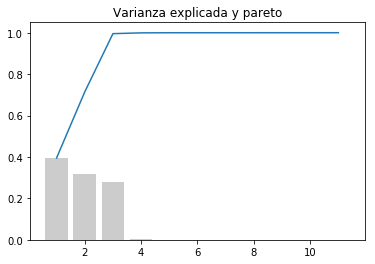

In [222]:
for i in range(len(pca.components_)):
    print('% Var. explicada ('+str(i+1)+' componentes): ', np.cumsum(pca.explained_variance_ratio_)[i]*100)
    
plt.bar(range(1,len(pca.components_)+1),pca.explained_variance_ratio_, alpha=.2,color='0')
plt.plot(range(1,len(pca.components_)+1),np.cumsum(pca.explained_variance_ratio_),alpha=4)
plt.title("Varianza explicada y pareto")
plt.show()

In [224]:
bd_full[columnsNumeric].corr()

**5. ANALISIS CLUSTER**

In [225]:
from sklearn.cluster import KMeans
from sklearn import metrics
from sklearn.metrics import pairwise_distances_argmin_min 

In [220]:
#Variables a trabajar
var_trabajar = columnsNumeric + columnsString_D
var_trabajar

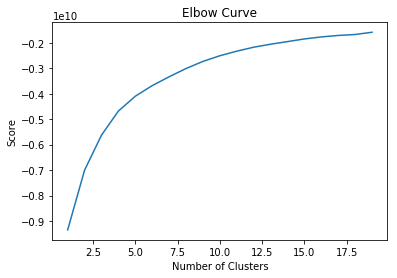

In [226]:
x_train = np.array(bd_full[var_trabajar])

Nc = range(1, 20)
kmeans = [KMeans(n_clusters=i) for i in Nc]
kmeans
score = [kmeans[i].fit(x_train).score(x_train) for i in range(len(kmeans))]
score
plt.plot(Nc,score)
plt.xlabel('Number of Clusters')
plt.ylabel('Score')
plt.title('Elbow Curve')
plt.show()

In [162]:
#Evaluamos los indicadores para escoger el nro de cluster óptimos
ctdDf = int(0.1*bd_full.shape[0])
cluster = [kmeans[i].predict(x_train) for i in range(len(kmeans))]

for i in range(1,19):    
    print(str(i+1)+' clústeres:')
    print('Inercia: '+str(kmeans[i].inertia_))
    print('Silueta: '+str(metrics.silhouette_score(x_train, cluster[i], metric='euclidean',sample_size=ctdDf)))
    print('Distancias: '+str(pairwise_distances_argmin_min(kmeans[i].cluster_centers_, x_train)[0]))
    print("\n")

2 clústeres:
Inercia: 58362402.28478558
Silueta: 0.2923282950070485
Distancias: [146 553]


3 clústeres:
Inercia: 47639767.83638764
Silueta: 0.30722904354708314
Distancias: [759 308   7]


4 clústeres:
Inercia: 39653397.79412355
Silueta: 0.3021237934207316
Distancias: [223 308 369 189]


5 clústeres:
Inercia: 34999986.94892241
Silueta: 0.3167906280058473
Distancias: [492 759 191  93 369]


6 clústeres:
Inercia: 31315831.96178791
Silueta: 0.23854870277701742
Distancias: [203 759 796  93 492 793]


7 clústeres:
Inercia: 28296510.875281826
Silueta: 0.33784301593916605
Distancias: [352 669 627 132 296  93 798]


8 clústeres:
Inercia: 25601123.433514837
Silueta: 0.3154102551788127
Distancias: [492 689 521 627 614 624 645 206]


9 clústeres:
Inercia: 24107459.317962967
Silueta: 0.31834089662234943
Distancias: [813 758 212 369 743 130 731 669 786]


10 clústeres:
Inercia: 21680702.0512558
Silueta: 0.29923227051049966
Distancias: [731 516 123 314 786 178 212 296 645 153]


11 clústeres:
Inerci

In [250]:
#Escogemos el nro de cluster adeucdo
kmeans = KMeans(n_clusters = 3)
kmeans.fit(x_train)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=3, n_init=10, n_jobs=None, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

In [170]:
kmeans.cluster_centers_

In [251]:
kmeans.predict(x_train)
bd_full["cluster03"] = kmeans.predict(x_train)

In [252]:
bd_full.groupby('cluster03').size()

cluster03
0    18098
1    52100
2    19583
dtype: int64

In [176]:
bd_full.shape

(896, 90)

**6. Generamos nuestra base modeler**

In [ ]:
columnsEvaluar = columnsNumeric + ["cluster03"] + columnsString_D + ["target"]
bd_modeler = bd_full[columnsEvaluar]

In [268]:
columnsEvaluar = columnsNumeric + ["cluster03"] + columnsString_D
columnsFin = columnsNumeric + ["cluster03"] + columnsString_D + ["target"]
bd_modeler = bd_full[columnsFin]

**7. Particionado de datos: train y Test**

In [269]:
from sklearn.model_selection import train_test_split
X = bd_modeler[columnsEvaluar]
y = bd_modeler[["target"]]

#X.head(10)
#y.head(10)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 43)

In [270]:
pdX_train = pd.DataFrame(X_train, columns = columnsEvaluar)
pdy_train = pd.DataFrame(y_train, columns = ["target"])
pdX_test = pd.DataFrame(X_test, columns = columnsEvaluar)
pdy_test = pd.DataFrame(y_test, columns = ["target"])

In [271]:
#Regresión logistica
#==============#============
from sklearn.linear_model import LogisticRegression

clasificador = LogisticRegression()
clasificador.fit(pdX_train[columnsEvaluar], y_train)   

prediction_train = clasificador.score(pdX_train[columnsEvaluar], y_train)
prediction_test = clasificador.score(pdX_test[columnsEvaluar], y_test) 

C:\Users\Cesar Quezada\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Cesar Quezada\Anaconda3\lib\site-packages\sklearn\utils\validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [272]:
print(prediction_train)
print(prediction_test)

0.6186511472488305
0.6146906498858384


In [273]:
#Arboles de Decisiones:    
#==============#============
from sklearn.tree import DecisionTreeClassifier

clasificador2 = DecisionTreeClassifier(max_depth = 40)
clasificador2.fit(pdX_train[columnsEvaluar], y_train)

prediction2_train = clasificador2.score(pdX_train[columnsEvaluar], y_train)
prediction2_test = clasificador2.score(pdX_test[columnsEvaluar], y_test)

In [274]:
print(prediction2_train)
print(prediction2_test)

0.9992899309423035
0.5536559558946372


In [275]:
#Modelo GBoosting:
#=====#============
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier

clasificador3 = GradientBoostingClassifier(n_estimators=200, max_depth = 4, learning_rate = .4)
clasificador3.fit(pdX_train[columnsEvaluar], pdy_train)

prediction3_train = clasificador3.score(pdX_train[columnsEvaluar], pdy_train)
prediction3_test = clasificador3.score(pdX_test[columnsEvaluar], pdy_test)

C:\Users\Cesar Quezada\Anaconda3\lib\site-packages\sklearn\utils\validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [276]:
print(prediction3_train)
print(prediction3_test)

0.7018266874582312
0.6411984184440608
